In [2]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [124]:
bp_file = '/data/data1/diabetes/EMR-data/Cholesterol.csv'
bp_file_p = '/data/data1/diabetes/EMR-data2/Cholesterol.csv'

In [125]:
data_pd = pd.read_csv(bp_file, sep='|')


In [126]:
data_pd.shape

(69940, 4)

In [127]:
data_pd = data_pd[~(data_pd['Result'].isna())]
data_pd.shape

(69521, 4)

In [128]:
len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5532

In [129]:
pd.Series(data_pd["Component"].tolist()).sort_values().unique()

array(['HDL', 'HGB A1C', 'LDL', 'TRIGLYCERIDE'], dtype=object)

In [130]:
data_pd.describe()

,Result,ResultYear
count,69521.000000,69521.000000
mean,85.924444,2016.591476
std,79.160590,1.498784
min,3.300000,2014.000000
25%,43.000000,2015.000000
50%,73.000000,2017.000000
75%,115.000000,2018.000000
max,6163.000000,2019.000000


In [152]:
hdl_dt = data_pd[data_pd["Component"]=='HDL']
len(hdl_dt[hdl_dt.duplicated(['Deidentified_Pat_ID','ResultYear'])])

2916

In [153]:
len(pd.Series(hdl_dt["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5466

In [154]:
hdl_dt = hdl_dt.sort_values('Result').drop_duplicates(['Deidentified_Pat_ID'],keep='last')
hdl_dt.reset_index(drop=True, inplace=True)
len(hdl_dt)

5466

In [155]:
a1c_dt = data_pd[data_pd["Component"]=='HGB A1C']
len(a1c_dt[a1c_dt.duplicated(['Deidentified_Pat_ID','ResultYear'])])

3726

In [156]:
len(pd.Series(a1c_dt["Deidentified_Pat_ID"].tolist()).sort_values().unique())

2287

In [157]:
a1c_dt = a1c_dt.sort_values('Result').drop_duplicates(['Deidentified_Pat_ID'],keep='last')
a1c_dt.reset_index(drop=True, inplace=True)
len(a1c_dt)

2287

In [158]:
ldl_dt = data_pd[data_pd["Component"]=='LDL']
len(ldl_dt[ldl_dt.duplicated(['Deidentified_Pat_ID','ResultYear'])])

2687

In [159]:
len(pd.Series(ldl_dt["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5373

In [160]:
ldl_dt = ldl_dt.sort_values('Result').drop_duplicates(['Deidentified_Pat_ID'],keep='last')
ldl_dt.reset_index(drop=True, inplace=True)
len(ldl_dt)

5373

In [161]:
triglyceride_dt = data_pd[data_pd["Component"]=='TRIGLYCERIDE']
len(triglyceride_dt[triglyceride_dt.duplicated(['Deidentified_Pat_ID'])])

14531

In [162]:
len(pd.Series(triglyceride_dt["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5468

In [163]:
triglyceride_dt = triglyceride_dt.sort_values('Result').drop_duplicates(['Deidentified_Pat_ID'],keep='last')
triglyceride_dt.reset_index(drop=True, inplace=True)
len(triglyceride_dt)

5468

In [164]:
triglyceride_dt.reset_index(drop=True, inplace=True)
triglyceride_dt.tail()

,Deidentified_Pat_ID,Component,Result,ResultYear
5463,ZZHTGTKH,TRIGLYCERIDE,2145.0,2015
5464,ZDDHKVNG,TRIGLYCERIDE,2391.0,2018
5465,ZNVONNVK,TRIGLYCERIDE,2668.0,2014
5466,ZHTNTKV,TRIGLYCERIDE,2776.0,2017
5467,ZDNAGGV,TRIGLYCERIDE,6163.0,2018


In [165]:
hdl_dt= hdl_dt[['Deidentified_Pat_ID','Result']]
hdl_dt.columns=['Deidentified_Pat_ID','hdl']
hdl_dt.head()

,Deidentified_Pat_ID,hdl
0,ZZZGNTKD,15.0
1,ZHKHHHZK,23.0
2,ZZTHAGZA,25.0
3,ZZAZHVDV,25.0
4,ZKTGHDZ,25.0


In [166]:
a1c_dt= a1c_dt[['Deidentified_Pat_ID','Result']]
a1c_dt.columns=['Deidentified_Pat_ID','a1c']
a1c_dt.head()

,Deidentified_Pat_ID,a1c
0,ZTHOKKH,3.7
1,ZHKTDTOH,4.2
2,ZHVGKDVV,4.3
3,ZHODZTV,4.3
4,ZHVGHKA,4.3


In [167]:
triglyceride_dt= triglyceride_dt[['Deidentified_Pat_ID','Result']]
triglyceride_dt.columns=['Deidentified_Pat_ID','triglyceride']
triglyceride_dt.head()

,Deidentified_Pat_ID,triglyceride
0,ZNODZHKT,20.0
1,ZHOHTGGV,23.0
2,ZDVZZVDT,24.0
3,ZDHVKTZT,26.0
4,ZDNVNAN,26.0


In [168]:
ldl_dt= ldl_dt[['Deidentified_Pat_ID','Result']]
ldl_dt.columns=['Deidentified_Pat_ID','ldl']
ldl_dt.head()

,Deidentified_Pat_ID,ldl
0,ZTTOAZ,10.0
1,ZZZKDTTZ,15.0
2,ZDHAHDV,17.0
3,ZHOHTGGV,19.0
4,ZHKTVTNV,24.0


In [169]:
res = pd.merge(triglyceride_dt,ldl_dt, how='outer',on=['Deidentified_Pat_ID'], indicator=True)
res.head()

,Deidentified_Pat_ID,triglyceride,ldl,_merge
0,ZNODZHKT,20.0,109.0,both
1,ZHOHTGGV,23.0,19.0,both
2,ZDVZZVDT,24.0,123.0,both
3,ZDHVKTZT,26.0,85.0,both
4,ZDNVNAN,26.0,59.0,both


In [170]:
res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl']]
res = pd.merge(res,hdl_dt, how='outer',on=['Deidentified_Pat_ID'], indicator=True)
res.head()

,Deidentified_Pat_ID,triglyceride,ldl,hdl,_merge
0,ZNODZHKT,20.0,109.0,74.0,both
1,ZHOHTGGV,23.0,19.0,33.0,both
2,ZDVZZVDT,24.0,123.0,75.0,both
3,ZDHVKTZT,26.0,85.0,65.0,both
4,ZDNVNAN,26.0,59.0,51.0,both


In [172]:
res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl']]
res = pd.merge(res,a1c_dt, how='outer',on=['Deidentified_Pat_ID'], indicator=True)
res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

,Deidentified_Pat_ID,triglyceride,ldl,hdl,a1c
0,ZNODZHKT,20.0,109.0,74.0,NaN
1,ZHOHTGGV,23.0,19.0,33.0,5.7
2,ZDVZZVDT,24.0,123.0,75.0,NaN
3,ZDHVKTZT,26.0,85.0,65.0,NaN
4,ZDNVNAN,26.0,59.0,51.0,NaN


In [173]:
res.shape, ldl_dt.shape,triglyceride_dt.shape

((5532, 5), (5373, 2), (5468, 2))

In [174]:
res.describe()

,triglyceride,ldl,hdl,a1c
count,5468.000000,5373.000000,5466.000000,2287.000000
mean,166.619422,122.790955,58.540505,6.367381
std,155.916396,35.991479,17.718897,1.547652
min,20.000000,10.000000,15.000000,3.700000
25%,93.000000,97.000000,46.000000,5.400000
50%,138.000000,120.000000,56.000000,5.800000
75%,199.000000,144.000000,68.000000,6.700000
max,6163.000000,370.000000,166.000000,16.000000


In [187]:
res[[ 'triglyceride','ldl', 'hdl','a1c']] = res[['triglyceride','ldl', 'hdl','a1c']].astype('float')
res.head()

,Deidentified_Pat_ID,triglyceride,ldl,hdl,a1c
0,ZNODZHKT,20.0,109.0,74.0,NaN
1,ZHOHTGGV,23.0,19.0,33.0,5.7
2,ZDVZZVDT,24.0,123.0,75.0,NaN
3,ZDHVKTZT,26.0,85.0,65.0,NaN
4,ZDNVNAN,26.0,59.0,51.0,NaN


In [191]:

tt = res[res['triglyceride'].notna()]
tt[[ 'triglyceride']] = tt[['triglyceride']].astype('int')
tt.head()

,Deidentified_Pat_ID,triglyceride,ldl,hdl,a1c
0,ZNODZHKT,20,109.0,74.0,NaN
1,ZHOHTGGV,23,19.0,33.0,5.7
2,ZDVZZVDT,24,123.0,75.0,NaN
3,ZDHVKTZT,26,85.0,65.0,NaN
4,ZDNVNAN,26,59.0,51.0,NaN


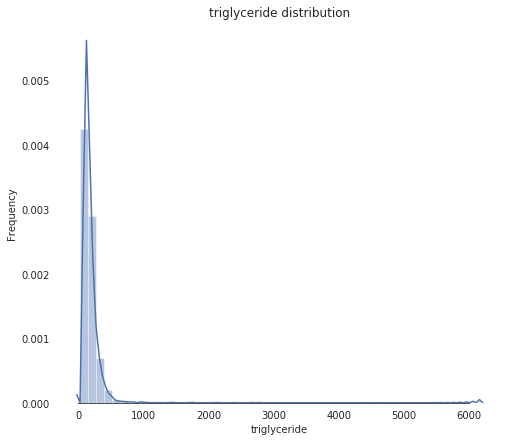

In [193]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(tt['triglyceride'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="triglyceride")
ax.set(title="triglyceride distribution")
sns.despine(trim=True, left=True)
plt.show()

In [194]:
tt = res[res['hdl'].notna()]
tt[[ 'hdl']] = tt[['hdl']].astype('float')
tt.head()

,Deidentified_Pat_ID,triglyceride,ldl,hdl,a1c
0,ZNODZHKT,20.0,109.0,74.0,NaN
1,ZHOHTGGV,23.0,19.0,33.0,5.7
2,ZDVZZVDT,24.0,123.0,75.0,NaN
3,ZDHVKTZT,26.0,85.0,65.0,NaN
4,ZDNVNAN,26.0,59.0,51.0,NaN


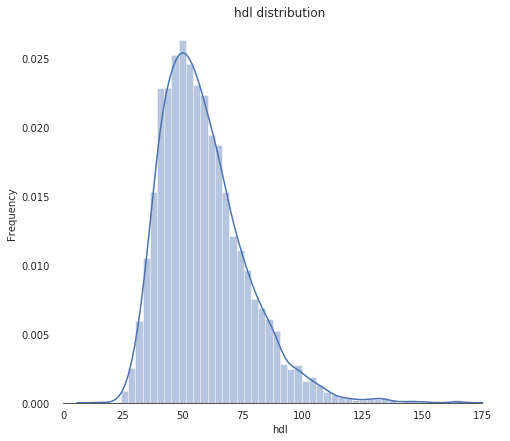

In [195]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(tt['hdl'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="hdl")
ax.set(title="hdl distribution")
sns.despine(trim=True, left=True)
plt.show()

In [196]:
tt = res[res['ldl'].notna()]
#tt[[ 'ldl']] = tt[['ldl']].astype('float')
tt.head()

,Deidentified_Pat_ID,triglyceride,ldl,hdl,a1c
0,ZNODZHKT,20.0,109.0,74.0,NaN
1,ZHOHTGGV,23.0,19.0,33.0,5.7
2,ZDVZZVDT,24.0,123.0,75.0,NaN
3,ZDHVKTZT,26.0,85.0,65.0,NaN
4,ZDNVNAN,26.0,59.0,51.0,NaN


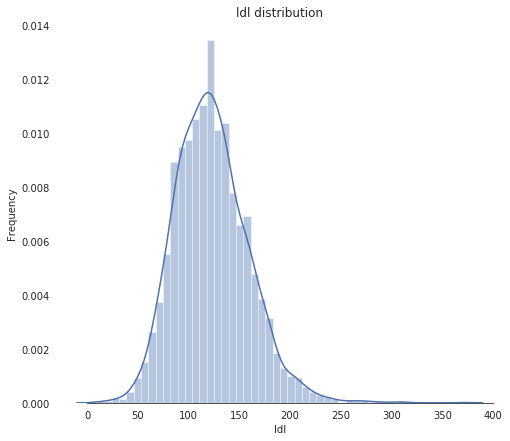

In [197]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(tt['ldl'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="ldl")
ax.set(title="ldl distribution")
sns.despine(trim=True, left=True)
plt.show()

In [198]:
tt = res[res['a1c'].notna()]
#tt[[ 'ldl']] = tt[['ldl']].astype('float')
tt.head()

,Deidentified_Pat_ID,triglyceride,ldl,hdl,a1c
1,ZHOHTGGV,23.0,19.0,33.0,5.7
13,ZNAHAODG,33.0,72.0,85.0,5.0
15,ZHHDDZAG,35.0,80.0,62.0,4.4
23,ZHTDTGZN,37.0,88.0,56.0,5.2
26,ZDVGGVK,37.0,96.0,80.0,5.2


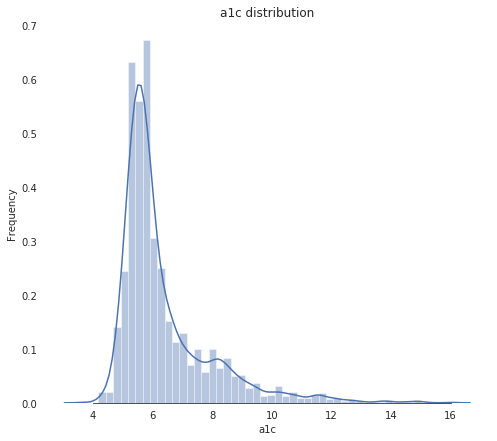

In [199]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(tt['a1c'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="a1c")
ax.set(title="a1c distribution")
sns.despine(trim=True, left=True)
plt.show()

In [190]:
res.to_csv(bp_file_p, index=False)